In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])


# Data Cleanup form a strings to list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Creating two charts to compare by using subplots

- Top 10 Job Postings countries for Data Analyst jobs with its salaries  
- Top 10 Job Pay countries for Data Analyst jobs with its salaries 



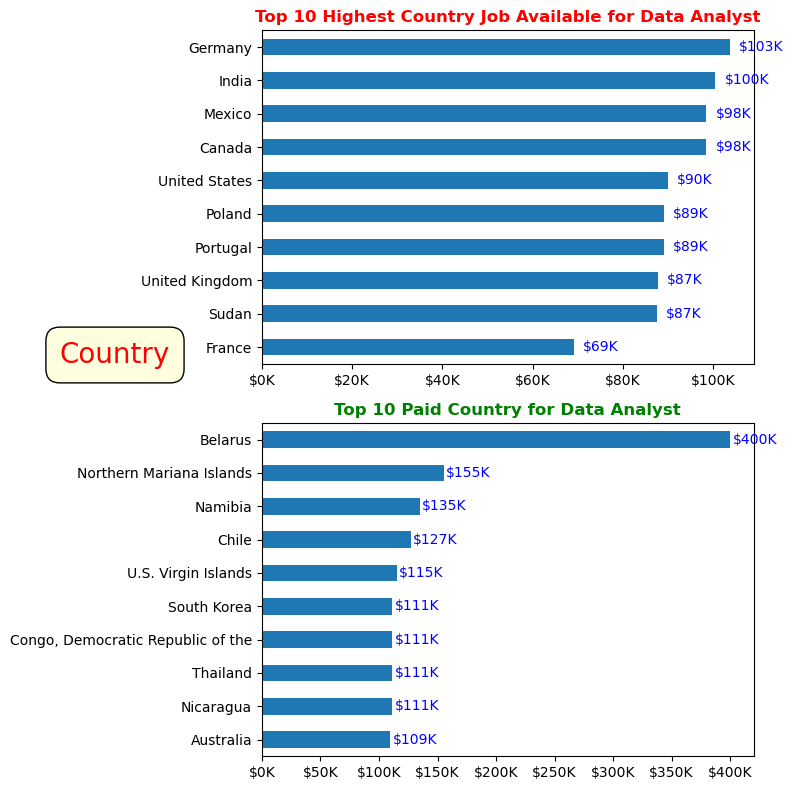

In [ ]:
# Searching only for Data Analyst job
dfL = df[df['job_title_short'] == 'Data Analyst'].copy()

# Drop the NaN values
dfL = dfL.dropna(subset=['salary_year_avg'])

# Creating a dataframe for the job country with its connected the count and the median of salary_year_avg for each country
dfL_group = dfL.groupby('job_country')['salary_year_avg'].agg(['count','median'])

# Only want the Top10 for count & median column 
dfL_count = dfL_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False)
dfL_pay = dfL_group.sort_values(by='median',ascending=False).head(10)

# Creating Subplots in 2 rows/1 column
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

# Plot the two charts using a for loop with ax[i]
for i, (df_plot, title, color) in enumerate([(dfL_count, 'Top 10 Highest Country Job Available for Data Analyst','red'), 
                                       (dfL_pay, 'Top 10 Paid Country for Data Analyst','green')]):
    df_plot.plot(kind='barh', y='median', ax=ax[i], legend=False)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_title(title, color=color, fontweight='bold')
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
    

    # Add actual salary next to each bar
    for index, value in enumerate(df_plot['median']):
        ax[i].text(value + 2000, index, f'${int(value / 1000)}K', va='center', color='blue')

fig.text(0.15, 0.55, 'Country', va='center', rotation='horizontal', ha='center', color='red', fontsize=20, 
         bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='lightyellow'))


plt.tight_layout()
plt.show()